# Notebook to make figures for conferences and manuscripts

Rainey Aberle

2022

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rxr
import contextily as cx
import geopandas as gpd
import pandas as pd
from skimage.measure import find_contours
import ee
import sys
from shapely.geometry import Point, LineString
import rasterio as rio
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, LightSource
import matplotlib
import glob
import wxee as wx
import geemap
import matplotlib
import pickle
from scipy.signal import medfilt
import os
import glob

# path to snow-cover-mapping
base_path = '/Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping/'

# determine whether to save output figures
save_figures = 0

# path for saving output figures
out_path = base_path+'figures/'

# add path to functions
sys.path.insert(1, base_path+'functions/')
import pipeline_utils_REORG as f

In [2]:
# Authenticate GEE
try:
    ee.Initialize()
except: 
    ee.Authenticate()
    ee.Initialize()

## Snow cover products comparison

In [ ]:
# # -----Load Landsat fSCA
# LS_fn = base_path+'../study-sites/Wolverine/imagery/Landsat/fSCA/LC08_AK_016008_20210829_20210913_02_SNOW/LC08_AK_016008_20210829_20210913_02_VIEWABLE_SNOW_UTM.TIF'
# LS = rxr.open_rasterio(LS_fn)
# # remove no-data values
# LS = LS.where(LS != -9999)
# # account for image multiplier
# LS_scalar = 0.001
# LS = LS * LS_scalar
# crs = LS.rio.crs.to_string()

# # -----Load MODIS fSCA
# M_fn = base_path+'../study-sites/Wolverine/imagery/MODIS/Terra_fSCA/2021_08_15.tif'
# M = rxr.open_rasterio(M_fn)
# # grab snow cover band
# M_fSCA = M.isel(band=0)
# # remove no data values
# M_fSCA = M_fSCA.where(M_fSCA != -3.2768e04)
# # reproject 
# M_fSCA= M_fSCA.rio.reproject(crs)

# # -----Load PlanetScope image and snow
# # RGB image
# PS_path = base_path+'../study-sites/Wolverine/imagery/PlanetScope/adjusted-filtered/'
# PS_fn = '20210815_20_adj.tif'
# PS = rxr.open_rasterio(PS_path + PS_fn)
# PS = PS / 1e4
# # classify image
# clf_fn = base_path+'/inputs-outputs/PS_classifier_all_sites.sav'
# clf = pickle.load(open(clf_fn, 'rb'))
# feature_cols_fn = base_path+'inputs-outputs/PS_feature_cols.pkl'
# feature_cols = pickle.load(open(feature_cols_fn,'rb'))
# sys.path.insert(1, base_path+'functions/')
# from ps_pipeline_utils import classify_image
# im_classified_fn, im = classify_image(PS_fn, PS_path, clf, feature_cols, False, None, out_path)
# # load classified image
# im_classified = rxr.open_rasterio(out_path + im_classified_fn) 

In [ ]:
# # -----Create snow colormap
# color_snow = '#4eb3d3'
# color_no_snow = 'w'
# # create colormap
# colors = [color_no_snow, color_snow]
# cmp = cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# # -----Plot
# fig, ax = plt.subplots(2, 2, figsize=(10,10))
# ax = ax.flatten()
# plt.rcParams.update({'font.size':16, 'font.sans-serif':'Arial'})
# xmin, xmax, ymin, ymax = 391, 399, 6694, 6702
# # MODIS
# M_im = ax[0].imshow(M_fSCA.data, cmap=cmp, clim=(0,100),
#                     extent=(np.min(M_fSCA.x.data)/1000, np.max(M_fSCA.x.data)/1000, 
#                             np.min(M_fSCA.y.data)/1000, np.max(M_fSCA.y.data)/1000))
# ax[0].set_xticks(np.linspace(392, 398, num=4))
# ax[0].set_yticks(np.linspace(6694, 6702, num=5))
# ax[0].set_xticklabels([])
# ax[0].set_xlim(xmin, xmax)
# ax[0].set_ylim(ymin, ymax)
# ax[0].set_ylabel('Northing [km]')
# ax[0].set_title('a) MODIS f$_{SCA}$')
# # LS
# LS_im = ax[1].imshow(LS_fSCA, cmap=cmp, clim=(0,1),
#                    extent=(np.min(LS_x)/1000, np.max(LS_x)/1000, np.min(LS_y)/1000, np.max(LS_y)/1000))
# ax[1].set_xticks(np.linspace(392, 398, num=4))
# ax[1].set_yticks(np.linspace(6694, 6702, num=5))
# ax[1].set_xticklabels([])
# ax[1].set_yticklabels([])
# ax[1].set_xlim(xmin, xmax)
# ax[1].set_ylim(ymin, ymax)
# ax[1].set_title('b) Landsat 8 f$_{SCA}$')
# # PS RGB
# ax[2].imshow(np.dstack([PS.data[2], PS.data[1], PS.data[0]]),
#            extent=(np.min(PS.x.data)/1000, np.max(PS.x.data)/1000, np.min(PS.y.data)/1000, np.max(PS.y.data)/1000))
# ax[2].set_xticks(np.linspace(392, 398, num=4))
# ax[2].set_yticks(np.linspace(6694, 6702, num=5))
# ax[2].set_xlim(xmin, xmax)
# ax[2].set_ylim(ymin, ymax)
# ax[2].set_ylabel('Northing [km]')
# ax[2].set_xlabel('Easting [km]')
# ax[2].set_title('c) PlanetScope RGB')
# # PS snow
# im_classified = im_classified.where(im_classified!=-9999)
# im_binary = xr.where(im_classified<=2, 1, 0)
# PS_snow_im = ax[3].imshow(im_binary.data[0], cmap=cmp, clim=(0,1),
#                    extent=(np.min(PS.x.data)/1000, np.max(PS.x.data)/1000, np.min(PS.y.data)/1000, np.max(PS.y.data)/1000))
# ax[3].set_xticks(np.linspace(392, 398, num=4))
# ax[3].set_yticks(np.linspace(6694, 6702, num=5))
# ax[3].set_yticklabels([])
# ax[3].set_xlim(xmin, xmax)
# ax[3].set_ylim(ymin, ymax)
# ax[3].set_xlabel('Easting [km]')
# ax[3].set_title('d) PlanetScope SCA')
# # colorbar
# cbar_ax = fig.add_axes([0.92, 0.35, 0.02, 0.3])
# fig.colorbar(M_im, cax=cbar_ax)
# plt.show()

# if save_figures:
#     fig.savefig(out_path+'comparing_SCA_products.png', dpi=300, facecolor='white', edgecolor='none')
#     print('figure saved to file')

## Study sites

In [ ]:
site_names = ['Wolverine', 'Gulkana', 'LemonCreek', 'SouthCascade', 'Sperry']
site_names_display = ['Wolverine', 'Gulkana', 'Lemon Creek', 'South Cascade', 'Sperry']
site_colors = ['#1f78b4', '#33a02c', '#fec44f', '#cc4c02', '#984ea3']
text_labels = ['a)', 'b)', 'c)', 'd)', 'e)']

# define colormap for elevations
cmap_elev = plt.cm.terrain(np.linspace(0, 1, 100))
cmap_elev = ListedColormap(cmap_elev[25:, :])

# -----Set up figure
fig, ax = plt.subplots(2, 3, figsize=(16, 12), layout='constrained')
plt.rcParams.update({'font.size':18, 'font.sans-serif':'Arial'})
ax = ax.flatten()
# -----Loop through sites
i=0
epsg_A = 32610
for site_name, site_color, site_name_display, text_label in list(zip(site_names, site_colors, site_names_display, text_labels)):
    ### AOI
    # load file
    AOI_fn = glob.glob(base_path + '../study-sites/' + site_name + '/glacier_outlines/' + site_name + '_USGS_*.shp')[0]
    AOI = gpd.read_file(AOI_fn)
    AOI_WGS = AOI.to_crs(4326)
    # solve for optimal UTM zone
    AOI_centroid = [AOI_WGS.geometry[0].centroid.xy[0][0],
                    AOI_WGS.geometry[0].centroid.xy[1][0]]
    epsg_UTM = pf.convert_wgs_to_utm(AOI_centroid[0], AOI_centroid[1])
    # reproject
    AOI_UTM = AOI_WGS.to_crs(epsg_UTM)
    AOI_A = AOI.to_crs(epsg_A)
    ### DEM
    DEM_fn = glob.glob(base_path + '../study-sites/' + site_name + '/DEMs/' + site_name + '*_DEM*.tif')[0]
    DEM = xr.open_dataset(DEM_fn)
    DEM = DEM.rename({'band_data': 'elevation'})
    # reproject 
    # DEM = DEM.rio.reproject(str('EPSG:'+epsg_UTM))
    ### Plot
    # A) Study sites map
    ax[0].plot(AOI_A.geometry[0].centroid.xy[0][0], AOI_A.geometry[0].centroid.xy[1][0], 
            '.', markerfacecolor=site_color, markeredgecolor='k', markersize=5)
    ax[0].text(AOI_A.geometry[0].centroid.xy[0][0], AOI_A.geometry[0].centroid.xy[1][0],
               text_labels[i], bbox=dict(facecolor='white', edgecolor='black', pad=3))
    # Individual glacier plot
    AOI_UTM.plot(ax=ax[i+1], edgecolor='k', facecolor='none', linewidth=2)
    ls = LightSource(azdeg=315, altdeg=45) # shade from the northwest, with the sun 45 degrees from horizontal
    x, y = DEM.x.data, DEM.y.data
    dx, dy = x[1]-x[0], y[1]-y[0]
    ax[i+1].imshow(ls.hillshade(DEM.elevation.data[0], vert_exag=1, dx=dx, dy=dy), cmap='Greys', extent=(x[0], x[-1], y[-1], y[0]))
    DEM_im = ax[i+1].imshow(DEM.elevation.data[0], cmap=cmap_elev, clim=(500, 3500), alpha=0.8, extent=(x[0], x[-1], y[-1], y[0]))
    if AOI.geometry[0].geom_type=='MultiPolygon':
        xmin_AOI = np.min([np.min(geom.exterior.coords.xy[0]) for geom in AOI.geometry[0].geoms])
        xmax_AOI = np.max([np.max(geom.exterior.coords.xy[0]) for geom in AOI.geometry[0].geoms])
        ymin_AOI = np.min([np.min(geom.exterior.coords.xy[1]) for geom in AOI.geometry[0].geoms])
        ymax_AOI = np.max([np.max(geom.exterior.coords.xy[1]) for geom in AOI.geometry[0].geoms])      
    else:
        xmin_AOI = np.min(AOI.geometry[0].exterior.coords.xy[0])
        xmax_AOI = np.max(AOI.geometry[0].exterior.coords.xy[0])
        ymin_AOI = np.min(AOI.geometry[0].exterior.coords.xy[1])
        ymax_AOI = np.max(AOI.geometry[0].exterior.coords.xy[1])  
    xmin = xmin_AOI - 0.1*(xmax_AOI - xmin_AOI)
    xmax = xmax_AOI + 0.1*(xmax_AOI - xmin_AOI)
    ymin = ymin_AOI - 0.1*(ymax_AOI - ymin_AOI)
    ymax = ymax_AOI + 0.1*(ymax_AOI - ymin_AOI) 
    # change x and y tick labels to km
    ax[i+1].set_xlim(xmin, xmax)
    ax[i+1].set_ylim(ymin, ymax)
    if i < 3:
        ax[i+1].set_xticks(np.arange(np.round(xmin,-3), np.round(xmax,-3), 2e3))
        ax[i+1].set_yticks(np.arange(np.round(ymin,-3), np.round(ymax,-3), 2e3)) 
    else:
        ax[i+1].set_xticks(np.arange(np.round(xmin,-3), np.round(xmax,-3), 1e3))
        ax[i+1].set_yticks(np.arange(np.round(ymin,-3), np.round(ymax,-3), 1e3)) 
    ax[i+1].set_xticklabels([str(int(x/1e3)) for x in ax[i+1].get_xticks()])
    ax[i+1].set_yticklabels([str(int(y/1e3)) for y in ax[i+1].get_yticks()])
    ax[i+1].set_title(text_label + ' ' + site_name_display + ' Glacier')
    ax[i+1].grid()
    # add axes labels
    if (i==1) or (i==3):
        ax[i].set_ylabel('Northing [km]')
    if i > 1:
        ax[i+1].set_xlabel('Easting [km]')
    
    # increase loop counter
    i+=1

# A: study sites map
ax[0].set_xlim(-1100000, 1500000)
ax[0].set_ylim(5000000, 7800000)
ax[0].set_xticks([])
ax[0].set_yticks([])
cx.add_basemap(ax[0], crs='EPSG:'+str(epsg_A), source=cx.providers.Esri.WorldGrayCanvas, attribution=False)
fig.colorbar(DEM_im, ax=[ax[2], ax[5]], shrink=0.5, label='Elevation [m]')
plt.show()

if save_figures:
    fig.savefig(out_path+'study_sites.png', dpi=300, facecolor='white', edgecolor='none')
    print('figure saved to file')

## Methods workflow

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


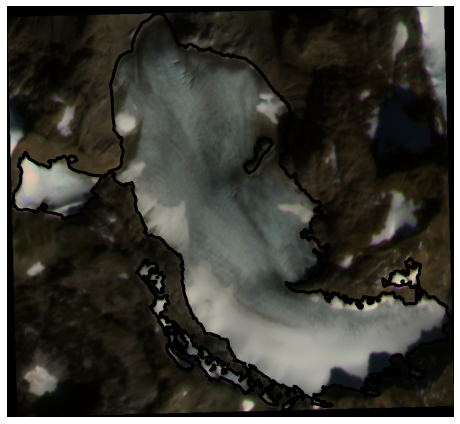

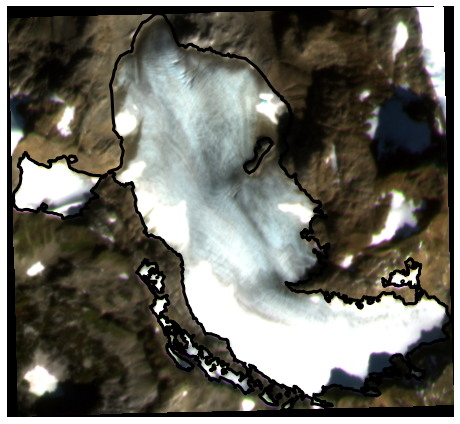

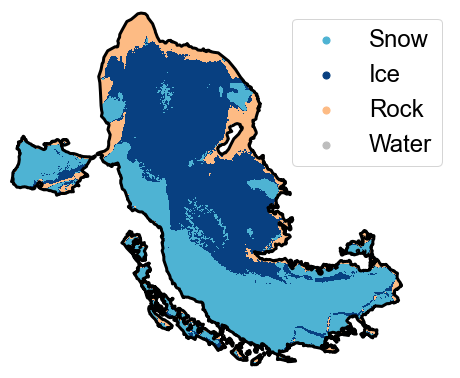

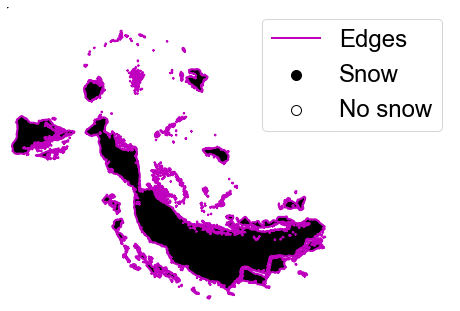

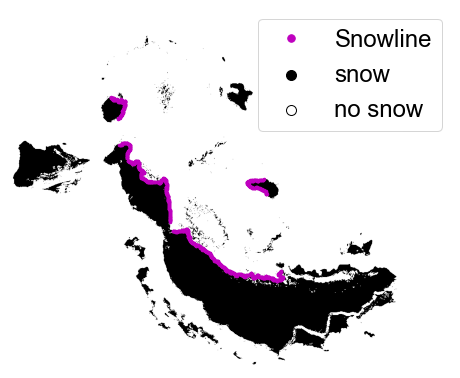

figures saved to file


In [38]:
font_size = 24
save_figures = 1

# -----Image settings
# site name
site_name = 'SouthCascade'
# define colors for classified image
color_snow = '#4eb3d3'
color_ice = '#084081'
color_rock = '#fdbb84'
color_water = '#bdbdbd'
# create colormap
colors = [color_snow, color_snow, color_ice, color_rock, color_water]
cmp = ListedColormap(colors)

# -----Load AOI as gpd.GeoDataFrame
AOI_fn = base_path + '../study-sites/' + site_name + '/glacier_outlines/' + site_name + '_USGS_*.shp'
AOI_fn = glob.glob(AOI_fn)[0]
AOI = gpd.read_file(AOI_fn)
# reproject the AOI to WGS to solve for the optimal UTM zone
AOI_WGS = AOI.to_crs(4326)
AOI_WGS_centroid = [AOI_WGS.geometry[0].centroid.xy[0][0],
                    AOI_WGS.geometry[0].centroid.xy[1][0]]
epsg_UTM = f.convert_wgs_to_utm(AOI_WGS_centroid[0], AOI_WGS_centroid[1])
    
# -----Load DEM as Xarray DataSet
DEM_fn = base_path + '../study-sites/' + site_name + '/DEMs/' + site_name + '*_DEM*.tif'
# reproject AOI to UTM
AOI_UTM = AOI.to_crs(str(epsg_UTM))
# load DEM as xarray DataSet
DEM_fn = glob.glob(DEM_fn)[0]
DEM = xr.open_dataset(DEM_fn)
DEM = DEM.rename({'band_data': 'elevation'})
# reproject the DEM to the optimal UTM zone
DEM = DEM.rio.reproject(str('EPSG:'+epsg_UTM))

# -----Load dataset dictionary
with open(base_path + 'inputs-outputs/datasets_characteristics.pkl', 'rb') as fn:
    dataset_dict = pickle.load(fn)
dataset = 'PlanetScope'
    
# -----1. Raw image
im_path = base_path + '../study-sites/' + site_name + '/imagery/PlanetScope/mosaics/'
im_fn = '20210924_18.tif'
im = rxr.open_rasterio(im_path + im_fn)
im = im / im_scalar
xmin, xmax, ymin, ymax = np.min(im.x.data), np.max(im.x.data), np.min(im.y.data), np.max(im.y.data)
# plot
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.imshow(np.dstack([im.data[2], im.data[1], im.data[0]]), 
           extent=(xmin, xmax, ymin, ymax))
AOI.plot(ax=ax1, facecolor='none', edgecolor='k', linewidth=3)
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
ax1.axis('off')

# -----2. Adjusted image
im_mosaic_fns = glob.glob(im_path+'*.tif')
polygon_top, polygon_bottom, im_mosaic_fn, im_mosaic = f.create_AOI_elev_polys(AOI_UTM, im_path, im_mosaic_fns, DEM)
plot_results = False
skip_clipped = False
im_adj, im_adj_method = f.PS_adjust_image_radiometry(im_fn, im_path, polygon_top, polygon_bottom,
    AOI_UTM, dataset_dict, dataset, site_name, skip_clipped, plot_results)
# plot
fig2, ax2 = plt.subplots(figsize=(8,8))
ax2.imshow(np.dstack([im_adj.red[0], im_adj.green[0], im_adj.blue[0]]), 
           extent=(xmin, xmax, ymin, ymax))
AOI_UTM.plot(ax=ax2, facecolor='none', edgecolor='k', linewidth=3)
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
ax2.axis('off')

# -----3. Classified image
im_classified_path = base_path + '../study-sites/' + site_name + '/imagery/classified/'
im_classified_fn = '20210924T180000_SouthCascade_PlanetScope_classified.nc'
im_classified = xr.open_dataset(im_classified_path + im_classified_fn)
im_classified = im_classified.where(im_classified!=-9999) # remove no data values
# plot
fig3, ax3 = plt.subplots(figsize=(8,8))
plt.rcParams.update({'font.size':font_size, 'font.sans-serif':'Arial'})
ax3.imshow(im_classified.classified[0].data, cmap=cmp, vmin=1, vmax=5,
           extent=(xmin, xmax, ymin, ymax))
AOI.plot(ax=ax3, facecolor='none', edgecolor='k', linewidth=3)
# plot dummy points for legend
ax3.scatter(0, 0, color=color_snow, s=50, label='Snow')
ax3.scatter(0, 0, color=color_ice, s=50, label='Ice')
ax3.scatter(0, 0, color=color_rock, s=50, label='Rock')
ax3.scatter(0, 0, color=color_water, s=50, label='Water')
ax3.set_xlim(xmin, xmax+300)
ax3.set_ylim(ymin, ymax)
ax3.legend(loc='upper right')
ax3.axis('off')

# -----4. Snow edges
# create binary snow matrix
im_binary = xr.where(im_classified.classified.data[0] <=2, 1, 0)
# Find contours at a constant value of 0.5 (between 0 and 1)
contours = find_contours(im_binary, 0.5)
# convert contour points to image coordinates
contours_coords = []
for contour in contours: 
    ix = np.round(contour[:,1]).astype(int)
    iy = np.round(contour[:,0]).astype(int)
    coords = (im_adj.isel(x=ix, y=iy).x.data, # image x coordinates
              im_adj.isel(x=ix, y=iy).y.data) # image y coordinates
    # zip points together
    xy = list(zip([x for x in coords[0]], 
                  [y for y in coords[1]]))
    contours_coords = contours_coords + [xy]
# plot
fig4, ax4 = plt.subplots(figsize=(8,8))
plt.rcParams.update({'font.size':font_size, 'font.sans-serif':'Arial'})
binary_plt = ax4.imshow(im_binary, cmap='Greys')
for i, contour in list(zip(np.arange(0,len(contours)), contours)):
    if i==0:
        plt.plot(contour[:,1], contour[:,0], '-m', label='Edges', linewidth=2)
    else:
        plt.plot(contour[:,1], contour[:,0], '-m', label='_nolegend', linewidth=2)
# plot dummy points for legend
ax4.scatter(np.array([-10, -9]),np.array([-10, -9]), edgecolor='k', facecolor='k', s=100, label='Snow')
ax4.scatter(np.array([-10, -9]),np.array([-10, -9]), edgecolor='k', facecolor='w', s=100, label='No snow')
ax4.set_xlim(0,len(im.x.data)+300)
ax4.set_ylim(len(im.y.data), 0)
ax4.legend(loc='upper right')
ax4.axis('off')

# -----5. Snow line
snowlines_fn = base_path + '../study-sites/' + site_name + '/imagery/snowlines/20210924T180000_SouthCascade_PlanetScope_snowline.pkl'
snowlines = pd.read_pickle(snowlines_fn)
snowline = snowlines['snowlines_coords'][0]
# plot
fig5, ax5 = plt.subplots(figsize=(8,8))
plt.rcParams.update({'font.size':font_size, 'font.sans-serif':'Arial'})
binary_plt = ax5.imshow(im_binary, 
                        extent=(xmin, xmax, ymin, ymax),
                        cmap='Greys')
ax5.plot(*snowline.coords.xy, '.m', label='_nolegend', markersize=5)
ax5.plot(-20, -20, '.m', label='Snowline', markersize=15)
# plot dummy points for legend
ax5.scatter(np.array([-10, -9]),np.array([-10, -9]), edgecolor='k', facecolor='k', s=100, label='snow')
ax5.scatter(np.array([-10, -9]),np.array([-10, -9]), edgecolor='k', facecolor='w', s=100, label='no snow')
ax5.set_xlim(xmin, xmax+300)
ax5.set_ylim(ymin, ymax)
ax5.legend(loc='upper right')
ax5.axis('off')
plt.show()

if save_figures:
    fig1.savefig(out_path+'methods_workflow_1.png', dpi=300, facecolor='white', edgecolor='none')
    fig2.savefig(out_path+'methods_workflow_2.png', dpi=300, facecolor='white', edgecolor='none')
    fig3.savefig(out_path+'methods_workflow_3.png', dpi=300, facecolor='white', edgecolor='none')
    fig4.savefig(out_path+'methods_workflow_4.png', dpi=300, facecolor='white', edgecolor='none')
    fig5.savefig(out_path+'methods_workflow_5.png', dpi=300, facecolor='white', edgecolor='none')
    print('figures saved to file')

## Median snow line elevations

### One site

Downloading:   0%|          | 0.00/28.2k [00:00<?, ?iB/s]

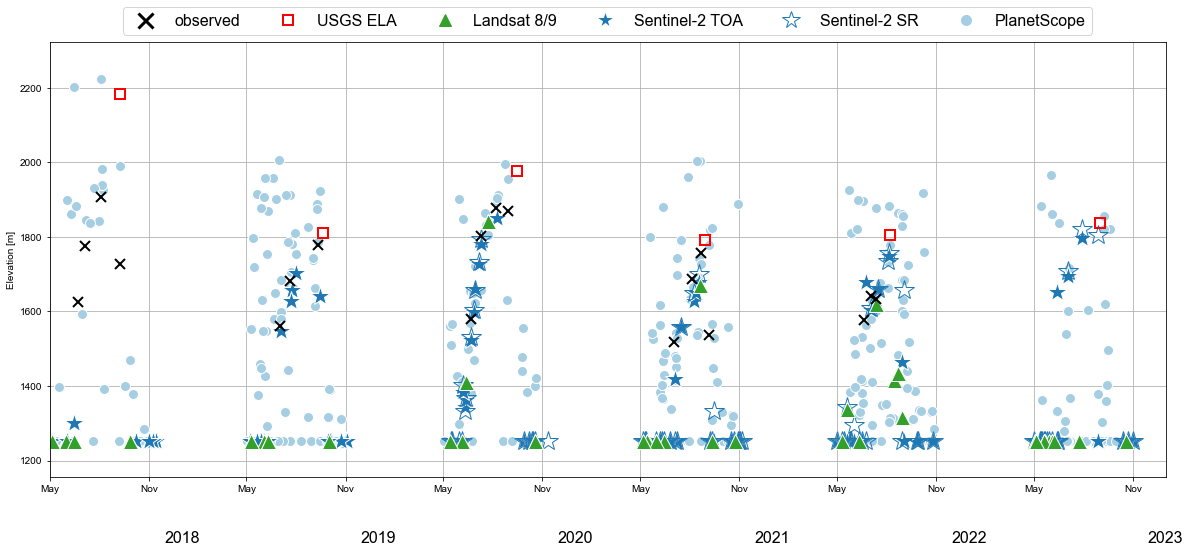

figure saved to file: /Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping/figures/median_snowline_elevs_Gulkana.png


In [3]:
# -----Settings and display parameters
site_name = 'Gulkana' # as shown in folder name
# site_name_display = 'Gulkana' # how to display on figure
dataset_colors = {'Landsat': '#33a02c',
                  'Sentinel2_TOA': '#1f78b4',
                  'Sentinel2_SR': '#1f78b4',
                  'PlanetScope': '#a6cee3'
                 }

# -----Path to USGS mass balance data
usgs_path = '/Volumes/GoogleDrive/My Drive/Research/PhD/GIS_data/USGS/benchmarkGlacier_massBalance/'
    
# -----Load estimated snow lines  
sl_est_fns = glob.glob(base_path + '../study-sites/' + site_name + '/imagery/snowlines/*snowline.pkl')
sl_ests = pd.DataFrame()
for sl_est_fn in sl_est_fns:
    sl_est = pd.read_pickle(sl_est_fn)
    sl_ests = pd.concat([sl_ests, sl_est])
sl_ests = sl_ests.reset_index(drop=True)
sl_ests['datetime'] = sl_ests['datetime'].astype(np.datetime64)

# -----Plot
# Set up figure
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
plt.rcParams.update({'font.size':16, 'font.sans-serif':'Arial'})
fmt_month = matplotlib.dates.MonthLocator(bymonth=(5, 11)) # minor ticks every month
fmt_year = matplotlib.dates.YearLocator() # minor ticks every year
# PlanetScope
ax.plot(sl_ests['datetime'].loc[sl_ests['dataset']=='PlanetScope'], 
           sl_ests['snowlines_elevs_median'].loc[sl_ests['dataset']=='PlanetScope'], 
           '.', markeredgecolor='w', markerfacecolor=dataset_colors['PlanetScope'], 
           markersize=20, markeredgewidth=1, label='_nolegend_')
# Sentinel-2 TOA
ax.plot(sl_ests['datetime'].loc[sl_ests['dataset']=='Sentinel2_TOA'], 
           sl_ests['snowlines_elevs_median'].loc[sl_ests['dataset']=='Sentinel2_TOA'], 
           '*', markeredgecolor='w', markerfacecolor=dataset_colors['Sentinel2_TOA'], 
           markersize=20, markeredgewidth=1, label='_nolegend_')
# Sentinel-2 SR
ax.plot(sl_ests['datetime'].loc[sl_ests['dataset']=='Sentinel2_SR'], 
           sl_ests['snowlines_elevs_median'].loc[sl_ests['dataset']=='Sentinel2_SR'], 
           '*', markeredgecolor=dataset_colors['Sentinel2_SR'], markerfacecolor='None', 
           markersize=20, markeredgewidth=1, label='_nolegend_')
# Landsat
ax.plot(sl_ests['datetime'].loc[sl_ests['dataset']=='Landsat'], 
           sl_ests['snowlines_elevs_median'].loc[sl_ests['dataset']=='Landsat'], 
           '^', markeredgecolor='w', markerfacecolor=dataset_colors['Landsat'], 
           markersize=15, markeredgewidth=1, label='_nolegend_')                
        
# -----Dummy points for legend
# observed
ax.plot(np.datetime64('1970-01-01'), 0, 'xk', 
           markersize=15, markeredgewidth=3, label='observed')
# USGS
ax.plot(np.datetime64('1970-01-01'), 0, 's', markerfacecolor='None', markeredgecolor='r', 
               ms=10, markeredgewidth=2, label='USGS ELA')
# Landsat
ax.plot(np.datetime64('1970-01-01'), 0, '^', 
           markeredgecolor=dataset_colors['Landsat'], markerfacecolor=dataset_colors['Landsat'], 
           markersize=12, label='Landsat 8/9')
# Sentinel-2 TOA
ax.plot(np.datetime64('1970-01-01'), 0, '*',
           markeredgecolor='w', markerfacecolor=dataset_colors['Sentinel2_TOA'], 
           markersize=18, label='Sentinel-2 TOA')
# Sentinel-2 SR
ax.plot(np.datetime64('1970-01-01'), 0, '*',
           markeredgecolor=dataset_colors['Sentinel2_SR'], markerfacecolor='None', 
           markersize=18, label='Sentinel-2 SR')
# PlanetScope
ax.plot(np.datetime64('1970-01-01'), 0, '.', 
       markeredgecolor=dataset_colors['PlanetScope'], markerfacecolor=dataset_colors['PlanetScope'], 
       markersize=20, label='PlanetScope')
ax.legend(loc='center', bbox_to_anchor=(0.5, 1.05), ncol=6)

# -----Observed snow lines
# define path to digitized snow lines
sl_obs_path = base_path + '../snowline-package/' + site_name + '/snowlines/'
sl_obs_fns = glob.glob(sl_obs_path + '*.shp')
# load AOI as gpd.GeoDataFrame
AOI_fn = base_path + '../study-sites/' + site_name + '/glacier_outlines/' + site_name + '_USGS_*.shp'
AOI_fn = glob.glob(AOI_fn)[0]
AOI = gpd.read_file(AOI_fn)
# load DEM from GEE
DEM, AOI_UTM = pf.query_GEE_for_DEM(AOI)
# loop through observed snow lines
for j, sl_obs_fn in enumerate(sl_obs_fns):
    # load observed snow line
    sl_obs = gpd.read_file(sl_obs_fn)
    # extract date from filename
    date = sl_obs_fn.split('/'+site_name+'_')[1][0:8]
    datetime = np.datetime64(date[0:4] + '-' + date[4:6] + '-' + date[6:8]
                             + 'T00:00:00')
    # reproject snow line to UTM
    sl_obs_UTM = sl_obs.to_crs(str(AOI_UTM.crs.to_epsg()))
    # interpolate elevation at snow line points
    if len(sl_obs_UTM) > 1:
        sl_obs_elev = np.array([DEM.sel(time=DEM.time.data[0], x=x, y=y, method='nearest').elevation.data 
                            for x, y in list(zip(sl_obs_UTM.geometry[1].xy[0], 
                                                 sl_obs_UTM.geometry[1].xy[1]))])
    else:
        sl_obs_elev = np.array([DEM.sel(time=DEM.time.data[0], x=x, y=y, method='nearest').elevation.data 
                            for x, y in list(zip(sl_obs_UTM.geometry[0].xy[0], 
                                                 sl_obs_UTM.geometry[0].xy[1]))])
    # calculate median snow line elevation
    sl_obs_elev_median = np.nanmedian(sl_obs_elev)
    # plot
    ax.plot(datetime, sl_obs_elev_median, 'xk', markersize=10, markeredgewidth=2, label='_nolegend_')   
            
    # load USGS ELA estimates
    usgs_fn = usgs_path + site_name+'/Output_'+site_name+'_Glacier_Wide_solutions_calibrated.csv'
    usgs_file = pd.read_csv(usgs_fn)
    ELA = usgs_file['ELA']
    ELA_date = usgs_file['Ba_Date'].astype(np.datetime64)
    ax.plot(ELA_date, ELA, 's', markerfacecolor='None', markeredgecolor='r', 
               ms=10, markeredgewidth=2, label='_nolegend_')

# -----Adjust axes
# axis limits
xmin, xmax = np.datetime64('2017-05-01T00:00:00'), np.datetime64('2023-01-01T00:00:00')
sl_elev_median_min = np.min(sl_ests['snowlines_elevs_median'])
sl_elev_median_max = np.max(sl_ests['snowlines_elevs_median'])
ymin = sl_elev_median_min - 0.1*(sl_elev_median_max - sl_elev_median_min)
ymax = sl_elev_median_max + 0.1*(sl_elev_median_max - sl_elev_median_min)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid()
# x-labels
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%b'))
ax.xaxis.set_major_locator(fmt_month)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
sec_xaxis = ax.secondary_xaxis(-0.1)
sec_xaxis.xaxis.set_major_locator(fmt_year)
sec_xaxis.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
# Hide the second x-axis spines and ticks
sec_xaxis.spines['bottom'].set_visible(False)
sec_xaxis.tick_params(length=0, pad=10)
# y-label
ax.set_ylabel('Elevation [m]')
plt.show()
    
# -----Save figure
fig_fn = 'median_snowline_elevs_' + site_name + '.png'
fig.savefig(out_path + fig_fn, facecolor='w', dpi=300)
print('figure saved to file: '+out_path+fig_fn)

### Multiple sites

In [ ]:
# -----Settings and display parameters
site_names = ['Wolverine', 'Gulkana', 'LemonCreek', 'SouthCascade', 'Sperry']
site_names_display = ['Wolverine',  'Gulkana', 'Lemon Creek', 'South Cascade', 'Sperry']
dataset_colors = {'Landsat': '#33a02c',
                  'Sentinel2': '#1f78b4',
                  'PlanetScope': '#a6cee3'
                 }
text_labels = ['a)', 'b)', 'c)', 'd)', 'e)']

# -----Path to USGS mass balance data
usgs_path = '/Volumes/GoogleDrive/My Drive/Research/PhD/GIS_data/USGS/benchmarkGlacier_massBalance/'

# -----Set up figures
# sall sites
fig, ax = plt.subplots(5, 1, figsize=(20, 24))
ax = ax.flatten()
plt.rcParams.update({'font.size':20, 'font.sans-serif':'Arial'})
fmt_month = matplotlib.dates.MonthLocator(bymonth=(5, 11)) # minor ticks every month
fmt_year = matplotlib.dates.YearLocator() # minor ticks every year
# South Cascade
fig2, ax2 = plt.subplots(1, 1, figsize=(20, 8))
plt.rcParams.update({'font.size':20, 'font.sans-serif':'Arial'})
fmt_month = matplotlib.dates.MonthLocator(bymonth=(5, 11)) # minor ticks every month
fmt_year = matplotlib.dates.YearLocator() # minor ticks every year

# -----Loop through sites
for site_name, site_name_display, text_label, i in list(zip(site_names, site_names_display, text_labels, np.arange(0,len(site_names)))):
    
    print(site_name)
    print('----------')
    
    # load estimated snow lines  
    sl_est_path = glob.glob(base_path + '../study-sites/' + site_name + '/imagery/*snowlines.pkl')[0]
    sl_est = pd.read_pickle(sl_est_path)
    
    # load snowlines linear model
    sl_est_linear_mod_fn = glob.glob(base_path + '../study-sites/' + site_name + '/imagery/*snowlines_linear_model.pkl')[0]
    sl_est_linear_mod = pd.read_pickle(sl_est_linear_mod_fn)
    
    # plot
    # PlanetScope
    ax[i].plot(sl_est['datetime'].loc[sl_est['dataset']=='PlanetScope'], 
               sl_est['snowlines_elevs_median'].loc[sl_est['dataset']=='PlanetScope'], 
               '.', markeredgecolor='w', markerfacecolor=dataset_colors['PlanetScope'], 
               markersize=20, markeredgewidth=1, label='_nolegend_')
        
    # Sentinel-2
    ax[i].plot(sl_est['datetime'].loc[sl_est['dataset']=='Sentinel2'], 
               sl_est['snowlines_elevs_median'].loc[sl_est['dataset']=='Sentinel2'], 
               '*', markeredgecolor='w', markerfacecolor=dataset_colors['Sentinel2'], 
               markersize=20, markeredgewidth=1, label='_nolegend_')
    # Landsat
    ax[i].plot(sl_est['datetime'].loc[sl_est['dataset']=='Landsat'], 
               sl_est['snowlines_elevs_median'].loc[sl_est['dataset']=='Landsat'], 
               '^', markeredgecolor='w', markerfacecolor=dataset_colors['Landsat'], 
               markersize=15, markeredgewidth=1, label='_nolegend_')
    # linear trendlines
    for j in np.arange(0,len(sl_est_linear_mod)):
        ax[i].plot(sl_est_linear_mod.iloc[j]['X_mod'], sl_est_linear_mod.iloc[j]['y_mod_best'], 
                   '-k', linewidth=3)                  
        
    # axis limits
    xmin, xmax = np.datetime64('2016-05-01T00:00:00'), np.datetime64('2022-12-01T00:00:00')
    sl_elev_median_min = np.min(sl_est['snowlines_elevs_median'])
    sl_elev_median_max = np.max(sl_est['snowlines_elevs_median'])
    ymin = sl_elev_median_min - 0.1*(sl_elev_median_max - sl_elev_median_min)
    ymax = sl_elev_median_max + 0.1*(sl_elev_median_max - sl_elev_median_min)
    ax[i].set_xlim(xmin, xmax)
    ax[i].set_ylim(ymin, ymax)
    ax[i].grid()
    # x-labels
    ax[i].xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%b'))
    ax[i].xaxis.set_major_locator(fmt_month)
    ax[i].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
    sec_xaxis = ax[4].secondary_xaxis(-0.1)
    sec_xaxis.xaxis.set_major_locator(fmt_year)
    sec_xaxis.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
    # Hide the second x-axis spines and ticks
    sec_xaxis.spines['bottom'].set_visible(False)
    sec_xaxis.tick_params(length=0, pad=10)
    if i<5:
        ax[i].set_xticklabels([])
        sec_xaxis.set_xticklabels([])
    # y-label
    ax[i].set_ylabel('Elevation [m]')
    # text label
    ax[i].text((xmax-xmin)*0.015 + xmin, (ymax-ymin)*0.87 + ymin, 
               text_label + ' ' + site_name_display, 
               bbox=dict(facecolor='white', edgecolor='black', pad=5))

    # -----Observed snow lines
    # define path to digitized snow lines
    sl_obs_path = base_path + '../snowline-package/' + site_name + '/snowlines/'
    sl_obs_fns = glob.glob(sl_obs_path + '*.shp')
    # load AOI as gpd.GeoDataFrame
    AOI_fn = base_path + '../study-sites/' + site_name + '/glacier_outlines/' + site_name + '_USGS_*.shp'
    AOI_fn = glob.glob(AOI_fn)[0]
    AOI = gpd.read_file(AOI_fn)
    # load DEM from GEE
    DEM, AOI_UTM = pf.query_GEE_for_DEM(AOI)
    # loop through observed snow lines
    for j, sl_obs_fn in enumerate(sl_obs_fns):
        # load observed snow line
        sl_obs = gpd.read_file(sl_obs_fn)
        # extract date from filename
        date = sl_obs_fn.split('/'+site_name+'_')[1][0:8]
        datetime = np.datetime64(date[0:4] + '-' + date[4:6] + '-' + date[6:8]
                                 + 'T00:00:00')
        # reproject snow line to UTM
        sl_obs_UTM = sl_obs.to_crs(str(AOI_UTM.crs.to_epsg()))
        # interpolate elevation at snow line points
        if len(sl_obs_UTM) > 1:
            sl_obs_elev = np.array([DEM.sel(time=DEM.time.data[0], x=x, y=y, method='nearest').elevation.data 
                                for x, y in list(zip(sl_obs_UTM.geometry[1].xy[0], 
                                                     sl_obs_UTM.geometry[1].xy[1]))])
        else:
            sl_obs_elev = np.array([DEM.sel(time=DEM.time.data[0], x=x, y=y, method='nearest').elevation.data 
                                for x, y in list(zip(sl_obs_UTM.geometry[0].xy[0], 
                                                     sl_obs_UTM.geometry[0].xy[1]))])
        # calculate median snow line elevation
        sl_obs_elev_median = np.nanmedian(sl_obs_elev)
        # plot
        ax[i].plot(datetime, sl_obs_elev_median, 'xk', markersize=10, markeredgewidth=2, label='_nolegend_')   
            
    # load USGS ELA estimates
    usgs_fn = usgs_path + site_name+'/Output_'+site_name+'_Glacier_Wide_solutions_calibrated.csv'
    usgs_file = pd.read_csv(usgs_fn)
    ELA = usgs_file['ELA']
    ELA_date = usgs_file['Ba_Date'].astype(np.datetime64)
    ax[i].plot(ELA_date, ELA, 's', markerfacecolor='None', markeredgecolor='r', 
               ms=10, markeredgewidth=2, label='_nolegend_')
        
    # -----South Cascade figure
    if site_name=='SouthCascade':
        # PlanetScope
        ax2.plot(sl_est['datetime'].loc[sl_est['dataset']=='PlanetScope'], 
               sl_est['snowlines_elevs_median'].loc[sl_est['dataset']=='PlanetScope'], 
               '.', markeredgecolor='w', markerfacecolor=dataset_colors['PlanetScope'], 
               markersize=20, markeredgewidth=1, label='PlanetScope')
        # Sentinel-2
        ax2.plot(sl_est['datetime'].loc[sl_est['dataset']=='Sentinel2'], 
               sl_est['snowlines_elevs_median'].loc[sl_est['dataset']=='Sentinel2'], 
               '*', markeredgecolor='w', markerfacecolor=dataset_colors['Sentinel2'], 
               markersize=20, markeredgewidth=1, label='Sentinel-2')
        # Landsat
        ax2.plot(sl_est['datetime'].loc[sl_est['dataset']=='Landsat'], 
               sl_est['snowlines_elevs_median'].loc[sl_est['dataset']=='Landsat'], 
               '^', markeredgecolor='w', markerfacecolor=dataset_colors['Landsat'], 
               markersize=15, markeredgewidth=1, label='Landsat 8/9')
        # linear trendlines
        for j in np.arange(0,len(sl_est_linear_mod)):
            if j==0:
                ax2.plot(sl_est_linear_mod.iloc[j]['X_mod'], sl_est_linear_mod.iloc[j]['y_mod_best'], 
                     '-k', linewidth=3, label='linear trendline') 
            else:
                ax2.plot(sl_est_linear_mod.iloc[j]['X_mod'], sl_est_linear_mod.iloc[j]['y_mod_best'], 
                     '-k', linewidth=3, label='_nolegend_')
        # USGS ELAs
        ax2.plot(ELA_date, ELA, 's', markerfacecolor='None', markeredgecolor='r', 
                   ms=10, markeredgewidth=2, label='USGS ELA')
        ax2.legend(loc='center', bbox_to_anchor=(0.5, 1.1), ncol=5)
            
# -----Dummy points for legend
# observed
ax[0].plot(np.datetime64('1970-01-01'), 0, 'xk', 
           markersize=15, markeredgewidth=3, label='observed')
# USGS
ax[0].plot(np.datetime64('1970-01-01'), 0, 's', markerfacecolor='None', markeredgecolor='r', 
               ms=10, markeredgewidth=2, label='USGS ELA')
# Landsat
ax[0].plot(np.datetime64('1970-01-01'), 0, '^', 
           markeredgecolor=dataset_colors['Landsat'], markerfacecolor=dataset_colors['Landsat'], 
           markersize=12, label='Landsat 8/9')
# Sentinel-2
ax[0].plot(np.datetime64('1970-01-01'), 0, '*',
           markeredgecolor=dataset_colors['Sentinel2'], markerfacecolor=dataset_colors['Sentinel2'], 
           markersize=18, label='Sentinel-2')
# PlanetScope
ax[0].plot(np.datetime64('1970-01-01'), 0, '.', 
       markeredgecolor=dataset_colors['PlanetScope'], markerfacecolor=dataset_colors['PlanetScope'], 
       markersize=20, label='PlanetScope')
ax[0].legend(loc='center', bbox_to_anchor=(0.5, 1.15), ncol=5)

# -----Date label formatting
ax2.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%b'))
ax2.xaxis.set_major_locator(fmt_month)
ax2.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
# create a second x-axis beneath the first x-axis to show the year in YYYY format
sec_xaxis = ax2.secondary_xaxis(-0.05)
sec_xaxis.xaxis.set_major_locator(fmt_year)
sec_xaxis.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
# Hide the second x-axis spines and ticks
sec_xaxis.spines['bottom'].set_visible(False)
sec_xaxis.tick_params(length=0, pad=10)
ax2.set_xlim(np.datetime64('2016-05-01T00:00:00'), np.datetime64('2022-12-01T00:00:00'))
ax2.set_ylabel('Elevation [m]')
ax2.grid()
plt.show()
    
# -----Save figure
# if save_figures:
fig_fn = 'median_snowline_elevs.png'
fig.savefig(out_path + fig_fn, facecolor='w', dpi=300)
fig2_fn = 'median_snowline_elevs_SouthCascade.png'
fig2.savefig(out_path + fig2_fn, facecolor='w', dpi=300)
print('figures saved to file')

In [ ]:
fig = plt.figure(figsize=(8,8))
col = plt.cm.viridis
for i, site_name in enumerate(site_names):
    usgs_fn = usgs_path + site_name+'/Output_'+site_name+'_Glacier_Wide_solutions_calibrated.csv'
    usgs_file = pd.read_csv(usgs_fn)
    ELA = usgs_file['ELA']
    ELA_date = usgs_file['Ba_Date'].astype(np.datetime64)
    plt.plot(ELA_date, ELA, '.-', color=col((i+1)/len(site_names)), label=site_name)
plt.legend()
plt.show()

## Training data characteristics by dataset

In [ ]:
# -----Load dataset dictionary
with open(base_path + 'inputs-outputs/datasets_characteristics.pkl', 'rb') as fn:
    dataset_dict = pickle.load(fn)

# -----Define band ranges
L8_dict = dataset_dict['Landsat']
L8_dict['bands'] = {'SR_B2': {'name': 'blue',
                              'min_nm': 450,
                              'max_nm': 510},
                    'SR_B3': {'name': 'green',
                              'min_nm': 530,
                              'max_nm': 590},
                    'SR_B4': {'name': 'red',
                              'min_nm': 640,
                              'max_nm': 670},
                    'SR_B5': {'name': 'NIR',
                              'min_nm': 850,
                              'max_nm': 880},
                    'SR_B6': {'name': 'SWIR1',
                              'min_nm': 1570,
                              'max_nm': 1650},
                    'SR_B7': {'name': 'SWIR2',
                              'min_nm': 2110,
                              'max_nm': 2290}
                   }

S2_dict = dataset_dict['Sentinel-2']
S2_dict['bands'] = {'B2': {'name': 'blue',
                           'wavelength_min_nm': 459,
                           'wavelength_max_nm': 525
                          },
                    'B3': {'name': 'green',
                           'wavelength_min_nm': 541,
                           'wavelength_max_nm': 577
                          },
                    'B4': {'name': 'red',
                           'wavelength_min_nm': 649,
                           'wavelength_max_nm': 680
                          },
                    'B8': {'name': 'NIR',
                           'wavelength_min_nm': 780,
                           'wavelength_max_nm': 886
                          },
                    'B11': {'name': 'SWIR1',
                           'wavelength_min_nm': 1567,
                           'wavelength_max_nm': 1658
                            
                          },
                    'B12': {'name': 'SWIR2',
                           'wavelength_min_nm': 2114,
                           'wavelength_max_nm': 2289
                          }
                   }
PS_dict = dataset_dict['PlanetScope']
PS_dict['bands'] = {'B1': {'name': 'blue',
                           'wavelength_min_nm':,
                           'wavelength_max_nm': 
                          }


## Example ideal and difficult conditions

In [ ]:
# -----Set up figure
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
plt.rcParams.update({'font.size':28, 'font.sans-serif':'Arial'})
ax = ax.flatten()

# -----Ideal conditions
## PlanetScope - Wolverine - 20210815
# image
im_path = base_path + '../study-sites/Wolverine/imagery/PlanetScope/adjusted/'
im_fn = glob.glob(im_path + '*20210815*.nc')[0]
im = xr.open_dataset(im_fn)
im = im.isel(time=0)
# snowline
sl_fn = glob.glob(base_path + '../study-sites/Wolverine/imagery/PlanetScope/snowlines/*snowlines.pkl')[0]
sl = pd.read_pickle(sl_fn)
sl = sl.loc[sl['datetime']=='20210815T200000'].reset_index(drop=True)
# plot
ax[0].imshow(np.dstack([im['red'].data, im['green'].data, im['blue'].data]), 
             extent=(np.min(im.x.data), np.max(im.x.data), np.min(im.y.data), np.max(im.y.data)))
ax[0].plot(*sl['snowlines_coords'][0].coords.xy, '.m', markersize=2)
ax[0].text(ax[0].get_xlim()[0] + 0.85*(ax[0].get_xlim()[1] - ax[0].get_xlim()[0]), 
           ax[0].get_ylim()[0] + 0.05*(ax[0].get_ylim()[1] - ax[0].get_ylim()[0]),
           'a)', bbox=dict(facecolor='white', edgecolor='black', pad=3))
ax[0].set_title('Ideal conditions')
ax[0].set_xticks([])
ax[0].set_yticks([])
## PlanetScope - Lemon Creek - 20220821
# image
im_path = base_path + '../study-sites/LemonCreek/imagery/PlanetScope/adjusted/'
im_fn = glob.glob(im_path + '*20220821*.nc')[0]
im = xr.open_dataset(im_fn)
im = im.isel(time=0)
# snowline
sl_fn = glob.glob(base_path + '../study-sites/LemonCreek/imagery/PlanetScope/snowlines/*snowlines.pkl')[0]
sl = pd.read_pickle(sl_fn)
sl = sl.loc[sl['datetime']=='20220821T190000'].reset_index(drop=True)
# plot
ax[2].imshow(np.dstack([im['red'].data, im['green'].data, im['blue'].data]), 
             extent=(np.min(im.x.data), np.max(im.x.data), np.min(im.y.data), np.max(im.y.data)))
ax[2].plot(*sl['snowlines_coords'][0].coords.xy, '.m', markersize=2)
ax[2].text(ax[2].get_xlim()[0] + 0.8*(ax[2].get_xlim()[1] - ax[2].get_xlim()[0]), 
           ax[2].get_ylim()[0] + 0.05*(ax[2].get_ylim()[1] - ax[2].get_ylim()[0]),
           'c)', bbox=dict(facecolor='white', edgecolor='black', pad=3))
ax[2].set_xticks([])
ax[2].set_yticks([])

# -----Difficult conditions
## PlanetScope - Sperry - 20160816
# image
im_path = base_path + '../study-sites/Sperry/imagery/PlanetScope/adjusted/'
im_fn = glob.glob(im_path + '*20160816*.nc')[0]
im = xr.open_dataset(im_fn)
im = im.isel(time=0)
# snowline
sl_fn = glob.glob(base_path + '../study-sites/Sperry/imagery/PlanetScope/snowlines/*snowlines.pkl')[0]
sl = pd.read_pickle(sl_fn)
sl = sl.loc[sl['datetime']=='20160816T170000'].reset_index(drop=True)
# plot
ax[1].imshow(np.dstack([im['red'].data, im['green'].data, im['blue'].data]), 
             extent=(np.min(im.x.data), np.max(im.x.data), np.min(im.y.data), np.max(im.y.data)))
ax[1].plot(*sl['snowlines_coords'][0].coords.xy, '.m', markersize=2)
ax[1].text(ax[1].get_xlim()[0] + 0.85*(ax[1].get_xlim()[1] - ax[1].get_xlim()[0]), 
           ax[1].get_ylim()[0] + 0.05*(ax[1].get_ylim()[1] - ax[1].get_ylim()[0]),
           'b)', bbox=dict(facecolor='white', edgecolor='black', pad=3))
ax[1].set_title('Difficult conditions')
ax[1].set_xticks([])
ax[1].set_yticks([])

## PlanetScope - Gulkana - 20170629
# image
im_path = base_path + '../study-sites/Gulkana/imagery/PlanetScope/adjusted/'
im_fn = glob.glob(im_path + '*20170629*.nc')[0]
im = xr.open_dataset(im_fn)
im = im.isel(time=0)
# snowline
sl_fn = glob.glob(base_path + '../study-sites/Gulkana/imagery/PlanetScope/snowlines/*snowlines.pkl')[0]
sl = pd.read_pickle(sl_fn)
sl = sl.loc[sl['datetime']=='20170629T200000'].reset_index(drop=True)
# plot
ax[3].imshow(np.dstack([im['red'].data, im['green'].data, im['blue'].data]), 
             extent=(np.min(im.x.data), np.max(im.x.data), np.min(im.y.data), np.max(im.y.data)))
ax[3].plot(*sl['snowlines_coords'][0].coords.xy, '.m', markersize=2)
ax[3].text(ax[3].get_xlim()[0] + 0.9*(ax[3].get_xlim()[1] - ax[3].get_xlim()[0]), 
           ax[3].get_ylim()[0] + 0.08*(ax[3].get_ylim()[1] - ax[3].get_ylim()[0]),
           'd)', bbox=dict(facecolor='white', edgecolor='black', pad=3))
ax[3].set_xticks([])
ax[3].set_yticks([])

fig.tight_layout()
plt.show()

# -----Save figure
fig_fn = 'example_ideal+difficult_conditions.png'
fig.savefig(out_path + fig_fn, dpi=300, facecolor='w')
print('figure saved to file: '+ out_path + fig_fn)